In [78]:
import torch
import torchvision
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt

In [79]:
dataset = MNIST('./data', download=True)

In [80]:
len(dataset)

60000

In [81]:
test_dataset = MNIST(root='data/', train=False)
len(test_dataset)

10000

In [82]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x156363DBDC0>, 5)

In [83]:
%matplotlib inline

In [84]:
image, label = dataset[0]

Label:  5


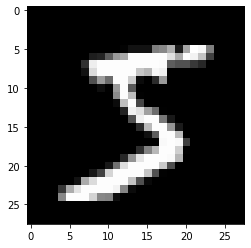

In [85]:
plt.imshow(image, cmap='gray')
print("Label: ", label)

Label:  0


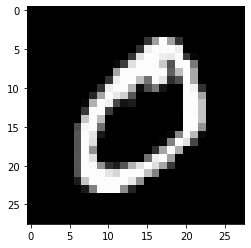

In [86]:
image, label = dataset[1]
plt.imshow(image, cmap='gray')
print("Label: ", label)

In [87]:
import torchvision.transforms as transforms

In [88]:
dataset = MNIST(root='data/', train=True, transform=transforms.ToTensor())

In [89]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


In [90]:
print(img_tensor[0, 10:15, 10:15])

tensor([[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
        [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
        [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
        [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
        [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]])


In [91]:
print(torch.max(img_tensor), torch.min(img_tensor))

tensor(1.) tensor(0.)


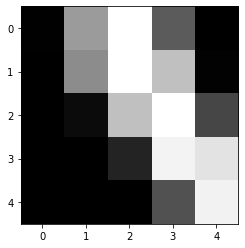

In [92]:
plt.imshow(img_tensor[0, 10:15, 10:15], cmap='gray')

In [93]:
from torch.utils.data import random_split

train_ds, val_ds = random_split(dataset, (50000, 10000))

In [94]:
len(train_ds), len(val_ds)

(50000, 10000)

In [95]:
from torch.utils.data import DataLoader

batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

In [96]:
import torch.nn as nn

In [97]:
input_size = 28 * 28
num_classes = 10

model = nn.Linear(input_size, num_classes)

In [98]:
print(model.weight.shape)
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[-0.0204,  0.0071, -0.0287,  ...,  0.0036,  0.0196,  0.0165],
        [-0.0287,  0.0017,  0.0166,  ..., -0.0055, -0.0104, -0.0087],
        [-0.0298,  0.0031, -0.0126,  ..., -0.0036,  0.0305,  0.0065],
        ...,
        [ 0.0174, -0.0159, -0.0029,  ..., -0.0045, -0.0162, -0.0292],
        [ 0.0243, -0.0109,  0.0308,  ..., -0.0096,  0.0276, -0.0096],
        [-0.0327, -0.0165, -0.0126,  ...,  0.0138, -0.0087, -0.0296]],
       requires_grad=True)

In [99]:
print(model.bias.shape)
model.bias

torch.Size([10])


Parameter containing:
tensor([ 0.0220, -0.0322, -0.0336, -0.0347, -0.0039, -0.0301, -0.0319,  0.0018,
         0.0201,  0.0339], requires_grad=True)

In [100]:
for images, labels in train_loader:
    print(labels)
    print(images.shape)
    try:
        outputs = model(images)
    except RuntimeError as e:
        print(e)
    print(outputs)
    break

tensor([1, 5, 2, 1, 4, 7, 8, 9, 7, 7, 8, 1, 2, 4, 6, 7, 0, 8, 6, 1, 7, 0, 3, 7,
        8, 0, 3, 1, 2, 7, 2, 1, 0, 1, 2, 7, 8, 6, 8, 6, 3, 5, 5, 3, 4, 9, 8, 2,
        4, 5, 6, 6, 7, 6, 5, 5, 5, 6, 0, 9, 6, 8, 9, 7, 2, 3, 4, 1, 3, 7, 3, 1,
        0, 7, 2, 4, 0, 2, 9, 0, 7, 7, 5, 4, 0, 2, 1, 6, 9, 2, 9, 4, 7, 3, 2, 4,
        2, 6, 1, 9, 8, 7, 5, 4, 0, 8, 2, 0, 1, 8, 4, 6, 3, 4, 6, 2, 5, 6, 6, 4,
        0, 8, 9, 0, 1, 6, 0, 8])
torch.Size([128, 1, 28, 28])
mat1 and mat2 shapes cannot be multiplied (3584x28 and 784x10)
tensor([[ 0.0732,  0.1692, -0.2889,  ...,  0.0197, -0.0070, -0.1884],
        [ 0.4875, -0.2135,  0.0578,  ..., -0.2950, -0.2415, -0.0679],
        [ 0.0554,  0.1358, -0.0284,  ..., -0.2729,  0.3359, -0.2539],
        ...,
        [ 0.3429, -0.0401,  0.0593,  ..., -0.1381, -0.1590, -0.0437],
        [ 0.0622,  0.2148, -0.0120,  ...,  0.0459,  0.3716, -0.2624],
        [ 0.3252,  0.0741, -0.0248,  ..., -0.0234, -0.2048, -0.1279]],
       grad_fn=<AddmmBackward0>)


In [101]:
images.shape

torch.Size([128, 1, 28, 28])

In [102]:
images.reshape(128, 784).shape

torch.Size([128, 784])

In [103]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out

model = MnistModel()

In [104]:
model.linear

Linear(in_features=784, out_features=10, bias=True)

In [105]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[-0.0092, -0.0299, -0.0033,  ...,  0.0199,  0.0200, -0.0335],
         [-0.0349,  0.0016,  0.0132,  ..., -0.0309,  0.0148, -0.0223],
         [-0.0140, -0.0146,  0.0130,  ..., -0.0295,  0.0199, -0.0134],
         ...,
         [-0.0345,  0.0194,  0.0179,  ..., -0.0224, -0.0134,  0.0003],
         [-0.0219, -0.0225,  0.0063,  ...,  0.0008, -0.0198, -0.0201],
         [-0.0214, -0.0122, -0.0222,  ...,  0.0208, -0.0328,  0.0314]],
        requires_grad=True),
 Parameter containing:
 tensor([-0.0097,  0.0041, -0.0207, -0.0103, -0.0289, -0.0291,  0.0024, -0.0255,
         -0.0285,  0.0041], requires_grad=True)]

In [106]:
for images, labels in train_loader:
    print(images.shape)
    outputs = model(images)
    break

torch.Size([128, 1, 28, 28])


In [107]:
print('outputs.shape : ', outputs.shape)
print('Sample outputs :\n', outputs[:2].data)

outputs.shape :  torch.Size([128, 10])
Sample outputs :
 tensor([[ 0.1342, -0.1450, -0.0101, -0.0867, -0.0291,  0.1057,  0.0921,  0.1254,
         -0.0638,  0.1859],
        [ 0.1283, -0.1830,  0.0171, -0.1846, -0.3948,  0.2072, -0.2277, -0.0821,
         -0.1583, -0.2310]])


In [108]:
import torch.nn.functional as F
outputs[:2]

tensor([[ 0.1342, -0.1450, -0.0101, -0.0867, -0.0291,  0.1057,  0.0921,  0.1254,
         -0.0638,  0.1859],
        [ 0.1283, -0.1830,  0.0171, -0.1846, -0.3948,  0.2072, -0.2277, -0.0821,
         -0.1583, -0.2310]], grad_fn=<SliceBackward0>)

In [109]:
probs = F.softmax(outputs, dim=1)
print("Sample probabilities:\n", probs[:2].data)
print("Sum: ", torch.sum(probs[0]).item())

Sample probabilities:
 tensor([[0.1103, 0.0834, 0.0954, 0.0884, 0.0937, 0.1072, 0.1057, 0.1093, 0.0905,
         0.1161],
        [0.1251, 0.0916, 0.1119, 0.0915, 0.0741, 0.1354, 0.0876, 0.1014, 0.0939,
         0.0873]])
Sum:  0.9999998807907104


In [110]:
max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)

tensor([9, 5, 9, 5, 5, 5, 5, 1, 5, 5, 6, 5, 5, 5, 1, 9, 9, 1, 1, 5, 0, 5, 6, 0,
        6, 5, 2, 9, 9, 5, 5, 5, 5, 6, 5, 1, 5, 0, 9, 9, 6, 1, 0, 5, 5, 5, 5, 5,
        5, 5, 7, 0, 5, 5, 0, 5, 5, 5, 5, 5, 6, 5, 5, 6, 5, 6, 5, 9, 0, 5, 5, 6,
        7, 2, 5, 0, 5, 5, 5, 5, 6, 6, 5, 5, 5, 6, 5, 1, 7, 5, 5, 0, 9, 7, 1, 5,
        5, 5, 5, 1, 5, 9, 9, 5, 5, 2, 6, 5, 5, 1, 5, 5, 0, 5, 7, 5, 5, 5, 1, 1,
        1, 5, 5, 5, 5, 5, 5, 5])
tensor([0.1161, 0.1354, 0.1294, 0.1233, 0.1607, 0.1791, 0.1547, 0.1110, 0.1401,
        0.1615, 0.1346, 0.1259, 0.1313, 0.1603, 0.1238, 0.1244, 0.1321, 0.1140,
        0.1169, 0.1336, 0.1095, 0.1419, 0.1176, 0.1162, 0.1390, 0.1297, 0.1261,
        0.1186, 0.1117, 0.1956, 0.1638, 0.1266, 0.1359, 0.1321, 0.1509, 0.1177,
        0.1603, 0.1288, 0.1124, 0.1448, 0.1410, 0.1271, 0.1188, 0.1407, 0.1341,
        0.1363, 0.1802, 0.1566, 0.1458, 0.1276, 0.1376, 0.1122, 0.1344, 0.1175,
        0.1232, 0.1620, 0.1257, 0.1605, 0.1347, 0.1674, 0.1256, 0.1419, 0.1282,
       

In [111]:
labels

tensor([5, 9, 3, 5, 2, 7, 4, 1, 8, 9, 5, 8, 3, 2, 1, 7, 3, 6, 1, 7, 6, 8, 5, 6,
        5, 8, 8, 9, 3, 2, 3, 5, 2, 6, 0, 8, 0, 9, 1, 4, 8, 1, 5, 2, 3, 5, 0, 9,
        7, 5, 8, 7, 8, 5, 5, 9, 4, 7, 4, 0, 5, 0, 9, 6, 3, 6, 2, 6, 1, 4, 8, 0,
        2, 1, 9, 5, 8, 9, 7, 9, 6, 5, 2, 2, 0, 6, 3, 0, 5, 1, 0, 9, 9, 5, 0, 1,
        5, 1, 7, 1, 0, 3, 5, 9, 8, 8, 8, 3, 7, 1, 4, 8, 5, 0, 8, 3, 9, 2, 1, 1,
        1, 2, 0, 7, 4, 8, 2, 7])

In [112]:
outputs[:2]

tensor([[ 0.1342, -0.1450, -0.0101, -0.0867, -0.0291,  0.1057,  0.0921,  0.1254,
         -0.0638,  0.1859],
        [ 0.1283, -0.1830,  0.0171, -0.1846, -0.3948,  0.2072, -0.2277, -0.0821,
         -0.1583, -0.2310]], grad_fn=<SliceBackward0>)

In [113]:
torch.sum(preds==labels)

tensor(22)

In [114]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

accuracy(outputs, labels)

tensor(0.1719)

In [115]:
probs

tensor([[0.1103, 0.0834, 0.0954,  ..., 0.1093, 0.0905, 0.1161],
        [0.1251, 0.0916, 0.1119,  ..., 0.1014, 0.0939, 0.0873],
        [0.0990, 0.0946, 0.0923,  ..., 0.1155, 0.0636, 0.1294],
        ...,
        [0.0709, 0.0928, 0.0831,  ..., 0.1142, 0.1007, 0.1195],
        [0.0877, 0.1010, 0.0930,  ..., 0.0930, 0.1153, 0.1338],
        [0.1120, 0.1033, 0.0779,  ..., 0.0950, 0.0843, 0.1327]],
       grad_fn=<SoftmaxBackward0>)

In [116]:
outputs

tensor([[ 0.1342, -0.1450, -0.0101,  ...,  0.1254, -0.0638,  0.1859],
        [ 0.1283, -0.1830,  0.0171,  ..., -0.0821, -0.1583, -0.2310],
        [-0.0735, -0.1198, -0.1442,  ...,  0.0805, -0.5162,  0.1935],
        ...,
        [-0.4318, -0.1623, -0.2725,  ...,  0.0454, -0.0804,  0.0907],
        [-0.1597, -0.0185, -0.1017,  ..., -0.1014,  0.1135,  0.2623],
        [ 0.0404, -0.0406, -0.3229,  ..., -0.1239, -0.2438,  0.2099]],
       grad_fn=<AddmmBackward0>)

In [117]:
loss_fn = F.cross_entropy

In [118]:
loss = loss_fn(outputs, labels)
print(loss)

tensor(2.2981, grad_fn=<NllLossBackward0>)


In [119]:
def fit(model, lr, train_loader, val_loader, epochs, opt_func=torch.optim.SGD):
    optimizer = opt_func(model.parameters(), lr)
    history = []

    for epoch in range(0, epochs):
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)

    return history

In [120]:
def evaluate(model, validation_loader):
    outputs = [model.validation_step(batch) for batch in validation_loader]
    return model.validation_epoch_end(outputs)

In [121]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out

    def training_step(self, batch):
        images, labels = batch
        out = self(images)
        loss = F.cross_entropy(out, labels)
        return loss

    def validation_step(self, batch):
        images, labels = batch
        out = self(images)
        loss = F.cross_entropy(out, labels)
        acc = accuracy(out, labels)
        return {'val_loss': loss, 'val_acc':acc}

    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()
        batch_acc = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_acc).mean()
        return {'val_loss':epoch_loss.item(), 'val_acc':epoch_acc.item()}

    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))

model = MnistModel()

In [122]:
result0= evaluate(model, val_loader)
result0

{'val_loss': 2.3239316940307617, 'val_acc': 0.10472705960273743}

In [123]:
history1 = fit(model, 0.001, train_loader, val_loader, 5)

Epoch [0], val_loss: 1.9566, val_acc: 0.6086
Epoch [1], val_loss: 1.6850, val_acc: 0.7363
Epoch [2], val_loss: 1.4814, val_acc: 0.7701
Epoch [3], val_loss: 1.3274, val_acc: 0.7901
Epoch [4], val_loss: 1.2089, val_acc: 0.8034


In [124]:
history2 = fit(model, 0.005, train_loader, val_loader, 5)

Epoch [0], val_loss: 0.8878, val_acc: 0.8309
Epoch [1], val_loss: 0.7463, val_acc: 0.8457
Epoch [2], val_loss: 0.6662, val_acc: 0.8541
Epoch [3], val_loss: 0.6135, val_acc: 0.8595
Epoch [4], val_loss: 0.5757, val_acc: 0.8645


In [125]:
history3 = fit(model, 0.01, train_loader, val_loader, 5)

Epoch [0], val_loss: 0.5250, val_acc: 0.8705
Epoch [1], val_loss: 0.4926, val_acc: 0.8768
Epoch [2], val_loss: 0.4691, val_acc: 0.8799
Epoch [3], val_loss: 0.4506, val_acc: 0.8850
Epoch [4], val_loss: 0.4369, val_acc: 0.8865


In [126]:
history4 = fit(model, 0.001, train_loader, val_loader, 5)

Epoch [0], val_loss: 0.4353, val_acc: 0.8873
Epoch [1], val_loss: 0.4340, val_acc: 0.8876
Epoch [2], val_loss: 0.4328, val_acc: 0.8877
Epoch [3], val_loss: 0.4316, val_acc: 0.8879
Epoch [4], val_loss: 0.4304, val_acc: 0.8880


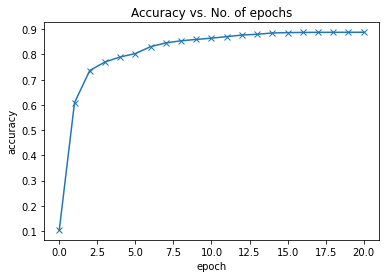

In [128]:
history = [result0] + history1 + history2 + history3 + history4
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');

In [129]:
test_dataset = MNIST(root='data/',
                     train=False,
                     transform=transforms.ToTensor())

Shape: torch.Size([1, 28, 28])
Label: 7


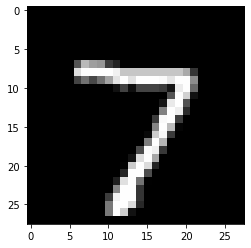

In [130]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Shape:', img.shape)
print('Label:', label)

In [131]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds = torch.max(yb, dim=1)
    return preds[0].item()

Label: 7 , Predicted: 7


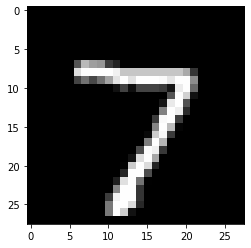

In [132]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap="gray")
print("Label:", label, ', Predicted:', predict_image(img, model))

Label: 6 , Predicted: 6


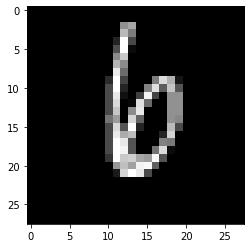

In [133]:
img, label = test_dataset[2131]
plt.imshow(img[0], cmap="gray")
print("Label:", label, ', Predicted:', predict_image(img, model))

In [134]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model, test_loader)
result

{'val_loss': 0.4052261412143707, 'val_acc': 0.8939453363418579}

In [135]:
torch.save(model.state_dict(), 'mnist-logistic.pth')

In [136]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0321, -0.0227,  0.0152,  ...,  0.0188,  0.0043, -0.0325],
                      [ 0.0053, -0.0191,  0.0047,  ..., -0.0189, -0.0032,  0.0139],
                      [ 0.0086,  0.0309,  0.0221,  ..., -0.0124, -0.0235, -0.0275],
                      ...,
                      [-0.0066, -0.0299,  0.0188,  ...,  0.0086, -0.0219,  0.0023],
                      [-0.0083,  0.0249,  0.0112,  ...,  0.0316,  0.0028, -0.0288],
                      [ 0.0117, -0.0099, -0.0221,  ..., -0.0108, -0.0297,  0.0266]])),
             ('linear.bias',
              tensor([-0.0527,  0.1922, -0.0453, -0.0622,  0.0322,  0.2028, -0.0190,  0.1282,
                      -0.2379, -0.0580]))])

In [137]:
model2 = MnistModel()

In [138]:
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0343,  0.0292, -0.0341,  ...,  0.0166,  0.0175, -0.0290],
                      [ 0.0082, -0.0164,  0.0123,  ..., -0.0328, -0.0125, -0.0125],
                      [ 0.0295, -0.0094,  0.0113,  ..., -0.0299,  0.0240,  0.0126],
                      ...,
                      [ 0.0253, -0.0101,  0.0167,  ...,  0.0185, -0.0066, -0.0258],
                      [-0.0247, -0.0313, -0.0107,  ..., -0.0340,  0.0219,  0.0251],
                      [ 0.0090,  0.0208,  0.0203,  ...,  0.0207, -0.0106, -0.0094]])),
             ('linear.bias',
              tensor([ 0.0303,  0.0115, -0.0339, -0.0257,  0.0354, -0.0177,  0.0130,  0.0339,
                      -0.0218,  0.0352]))])

In [139]:
evaluate(model2, test_loader)

{'val_loss': 2.334290027618408, 'val_acc': 0.12187500298023224}

In [140]:
evaluate(model, test_loader)

{'val_loss': 0.4052261412143707, 'val_acc': 0.8939453363418579}

In [141]:
model2.load_state_dict(torch.load("mnist-logistic.pth"))

<All keys matched successfully>

In [142]:
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0321, -0.0227,  0.0152,  ...,  0.0188,  0.0043, -0.0325],
                      [ 0.0053, -0.0191,  0.0047,  ..., -0.0189, -0.0032,  0.0139],
                      [ 0.0086,  0.0309,  0.0221,  ..., -0.0124, -0.0235, -0.0275],
                      ...,
                      [-0.0066, -0.0299,  0.0188,  ...,  0.0086, -0.0219,  0.0023],
                      [-0.0083,  0.0249,  0.0112,  ...,  0.0316,  0.0028, -0.0288],
                      [ 0.0117, -0.0099, -0.0221,  ..., -0.0108, -0.0297,  0.0266]])),
             ('linear.bias',
              tensor([-0.0527,  0.1922, -0.0453, -0.0622,  0.0322,  0.2028, -0.0190,  0.1282,
                      -0.2379, -0.0580]))])

In [143]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model2, test_loader)
result

{'val_loss': 0.4052261412143707, 'val_acc': 0.8939453363418579}